# Notebook for simulating and plotting spikes

This notebook shows you how to simulate single neurons and plot their spikes. We focus on understandability, not efficiency, so note that the code could be much more efficient.

First of all we need to install some prerequisites:

In [1]:
!pip install -q matplotlib numpy scipy tqdm

In [2]:
#!pip install -qU git+https://github.com/norse/norse

In [3]:
from norse.torch.module.lif import LIFFeedForwardCell
import torch
import numpy as np
from tqdm import tqdm

## Creating 10 leaky integrate-and-fire (LIF) neurons

To start simulating we need 10 neurons with a default state (`lif_state`) of, say, 1. The neurons will receive currents as inputs, and produce spikes as outputs. Note that both the `lif_state` variable contains a list of the state for each 10 neurons. That will be important later.

In [4]:
lif_cell = LIFFeedForwardCell([10])
lif_state = lif_cell.initial_state(1, "cpu")

## Creating data for the 10 neurons

To illustrate how a LIF neuron works, we wil simulate 100 timesteps. Each of the 10 neurons (indexed from 0 to 9) will receive the same input at every timestep. In the setup below, the input voltages follow the formula $i_n * 0.2$, where $i_n$ is the neuron index. Meaning, neuron 0 will receive an input of 0 for each timestep, so we do not expect that to spike. Neuron 1 will receive 0.2, so that *could* be enough for it to spike. Neuron 9 will receive an input of 1.80 every timestep, so we expect that to spike quite a few times.

In [5]:
timesteps = 100
data_in = np.array([np.zeros(timesteps) + i for i in np.arange(0, 2, 0.2)]).T

## Running the simulation

To run the simulation, we prepare a list of spikes and a state-variable, where the neuron states will be updated in. Remember that the `lif_state` variable contains 10 separate states - one for each neuron. This will be important, because we are giving each neuron a different input current each timestep. During the simulation, the states will update independently, resulting in different behaviours.

In [6]:
spikes = []
state = lif_state
for data in tqdm(data_in):
    out, state = lif_cell(data, state)
    spikes.append(np.array(out[0]))
spikes = np.array(spikes) # Convert the spike list to a Numpy array

100%|██████████| 100/100 [00:00<00:00, 5653.46it/s]


We now have the spike data as a list of outputs for each timestep. Let's see how it looks at timestep 100:

In [7]:
spikes[99]

array([0., 0., 0., 0., 0., 1., 0., 1., 0., 0.])

The data tells us that at timestep 100, neuron 5 and 7 emitted a spike.

## Plotting the spikes

There are likely many more spikes, but it's too much work to go through the array one timestep at the time. A spike plot is much better suited to give us an overview.

First, we import matplotlib.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

Basically, we want to show the timesteps on the x axis and the neuron index on the y axis. Spikes will then be shown as a tuple of (timestep, neuron_index). If there are no spike, we don't have to show anything. 

Matplotlib's [`.eventplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.eventplot.html?highlight=eventplot#matplotlib.pyplot.eventplot) is perfect for this. We just have to condense our spikes into a list of neurons, containing the timesteps that it fires. So, for neuron 0 that list will be empty, and for neuron 9 we will have a lot of spikes. The below code arranges that data, and we can see that neuron 5 still fires at timestep 99:

In [9]:
spike_data = [[x for x, spike in enumerate(inner_spikes) if spike > 0] for inner_spikes in spikes.T]
spike_data[5][-1] # Output the last spike from neuron number 9

99

We are finally ready to plot each neuron starting from 0.

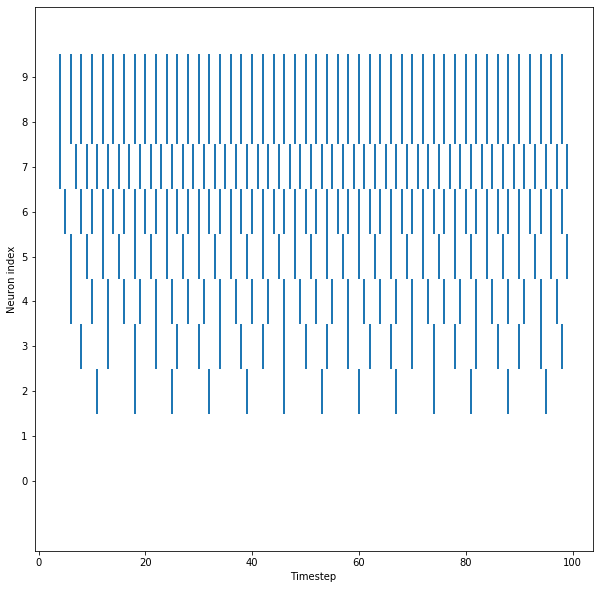

In [10]:
plt.figure(figsize=(10, 10))  # Set figure size 
plt.xlabel("Timestep")        # Label x axis
plt.ylabel("Neuron index")    # Label y axis
plt.yticks(list(range(10)))   # Force display all neuron indices
for i in range(10):           # Loop i from 0 to 9 (inclusive)
    plt.eventplot(spike_data) # Plot the timesteps where the neuron spiked